<h1>Classification</h1>

For this tutorial, esp. for the last task, among others, the following libraries need to be installed:
<ul>
    <li>pydot and dot.exe</li>
    <li>graphviz</li>
</ul>
If they are not yet installed on your system, please install them. <br>
Hints:<br>
<pre>
pip install pydot

conda install -c https://conda.anaconda.org/anaconda graphviz

Add the folder containing dot.exe to your system's PATH.

If some error occurs, Google for the error message.
</pre>

Import necessary libraries

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import urllib3
import sklearn.linear_model
import sklearn.tree
import sklearn.datasets 
import sklearn.metrics
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydot

Try to load the data...

In [21]:
data = np.loadtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data')

If the above instruction fails, you might need to clean the data, before you can load it. See the next cell for an example.

In [22]:
http = urllib3.PoolManager()
response = http.request('GET', 'https://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data')
data_str = response.data.decode('utf-8')

out_file = open('semeion_clean.data','w')
for line in data_str.split('\r\n'):
    out_file.write(line.strip()+'\n')
out_file.close()

data = np.loadtxt('semeion_clean.data', delimiter=' ', skiprows = 0)

D:\pyt\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<h2>Data Exploration</h2>

In [23]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
len(data)

1593

In [25]:
len(data[0])

266

Visualize the data

In [26]:
m = np.zeros( (5,5) )
m[:,2] = 1
m[1,:] = 1

In [27]:
m

array([[0., 0., 1., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

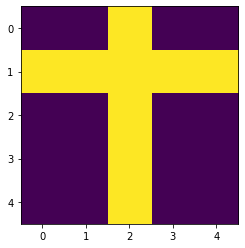

In [28]:
plt.imshow(m);

In [29]:
image_size = (16,16)
an_image = np.reshape(data[0,0:256], image_size )

In [30]:
an_image

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,

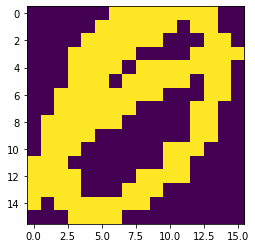

In [31]:
plt.imshow(an_image);

In [32]:
def visualize_data(data, images_per_row = 10):
    image_size = (16,16)
    num_instances = len(data)
    num_rows = int(num_instances/images_per_row)
    for j in range(0,num_rows):
        images = np.reshape(data[images_per_row*j,0:256],image_size)
        for i in range(1,images_per_row):
            next_image = np.reshape(data[images_per_row*j+i,0:256], image_size )
            images = np.hstack( (images, next_image) )

        plt.figure(figsize=(20, 2))
        plt.imshow(images)
        plt.show()

<h2>Optional Homework</h2>

If the number of images to be shown is not a multiple of the number of images per row, the last few images will not be shown. Modify the function in a way that all images are shown.

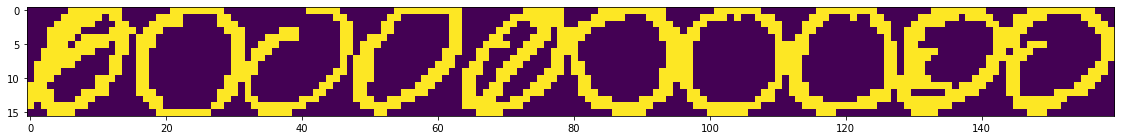

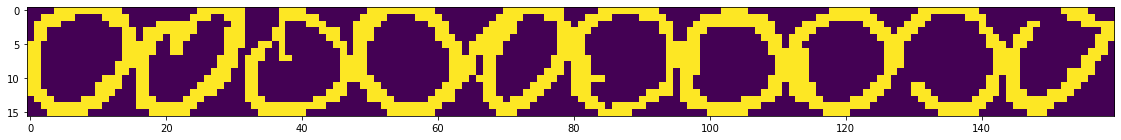

In [33]:
visualize_data(data[0:20] )

In [34]:
which_images_to_plot = np.array(range(20))*10

In [35]:
which_images_to_plot

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190])

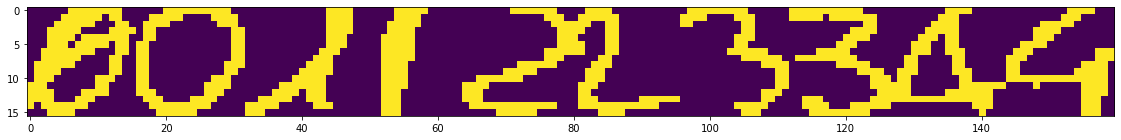

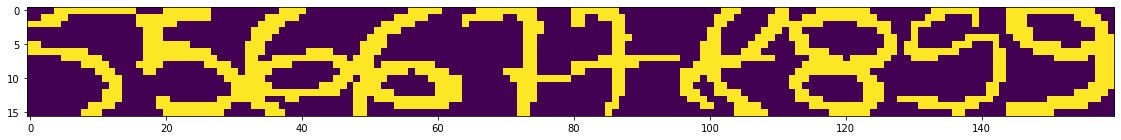

In [36]:
visualize_data(data[which_images_to_plot])

Let us have a look at the class labels

In [37]:
data[which_images_to_plot,256:266]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<h2>Task 1</h2>

Split the data into disjoint train, validation and test sets, so that 100 randomly selected instances belong to the train set, 500  randomly selected instances belong to the validation set and the remaining instances belong to the test set.

<b>Note:</b> Recognition of handwritten digits can be solved with high accuracy if enough training data is present. For the purpose of this tutorial, we use just a few training instances, i.e., we make the accuracy of the classifier arificially low. Otherwise, we would have almost perfect models and we could not demonstrate hyperparameter search.

In [38]:
# shuffle all data samples randomly and form a new order
np.random.shuffle(data)

# get the train data and labels
train_data = data[0:100, 0:256]
train_labels = data[0:100, 256:]

# get the validation data and labels
val_data = data[100:600, 0:256]
val_labels = data[100:600, 256:]

# get the test data and labels
test_data = data[600:, 0:256]
test_labels = data[600:, 256:]

Next, we train a model that is able to recognize the digit "8"

In [39]:
model = sklearn.linear_model.LogisticRegression()
model.fit(train_data, train_labels[:,8])

D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
predictions = model.predict(val_data)

<h2>Task 2</h2>

Visualize those images that were recognized as 8, as well as those images that were recognized as something else.

In [41]:
predictions==1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [42]:
val_data[predictions==1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

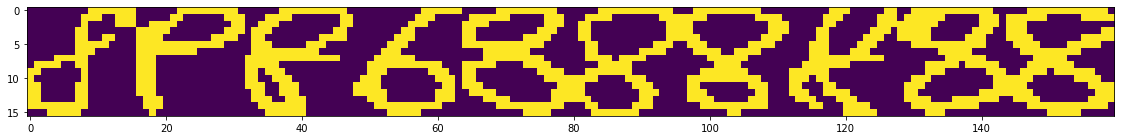

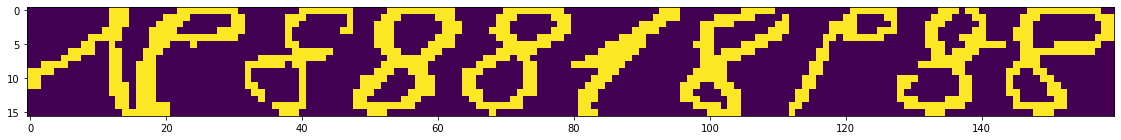

In [43]:
val_data_reg_as_8 = val_data[predictions==1] # all samples in the validation set that are regonized as 8
visualize_data(val_data_reg_as_8)

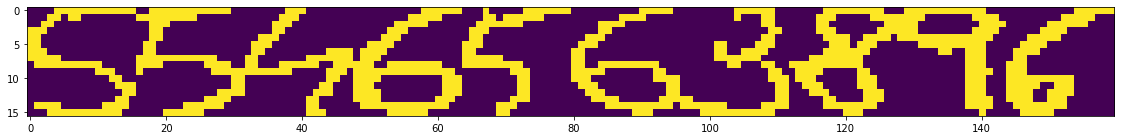

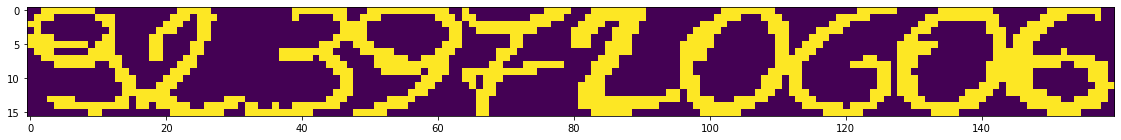

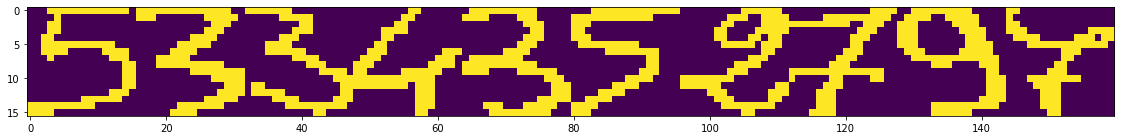

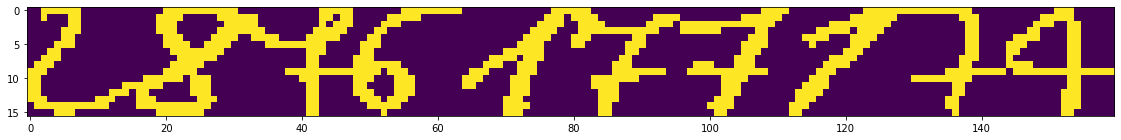

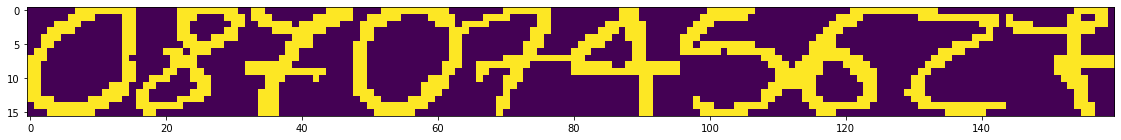

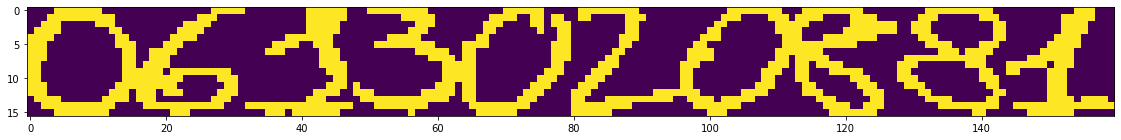

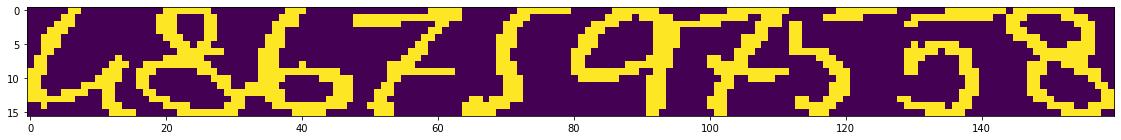

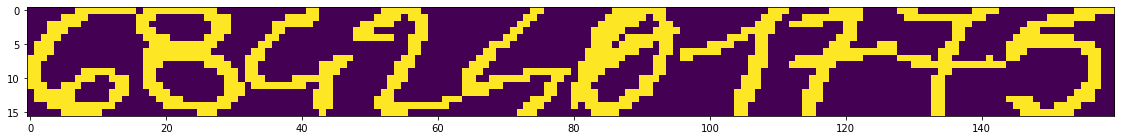

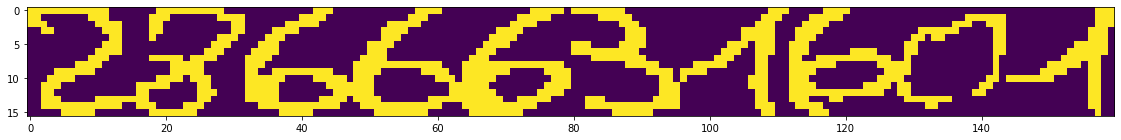

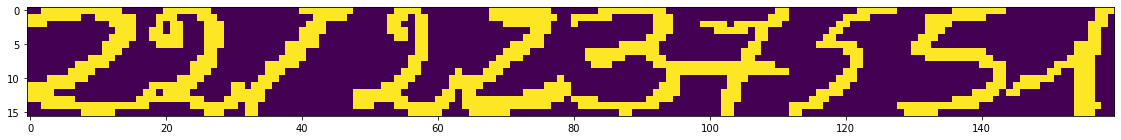

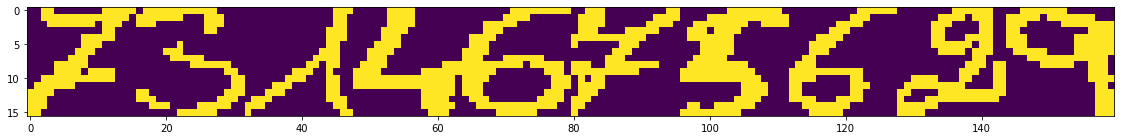

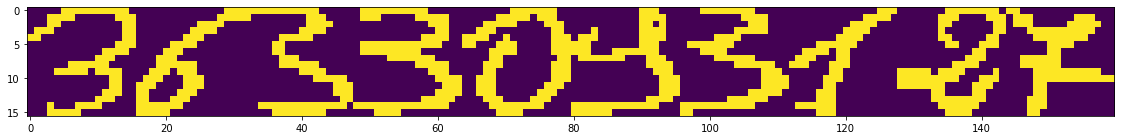

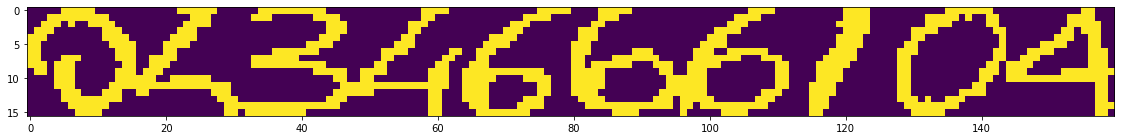

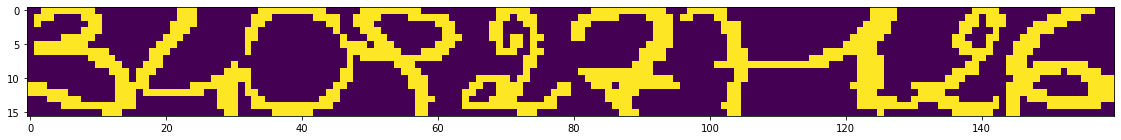

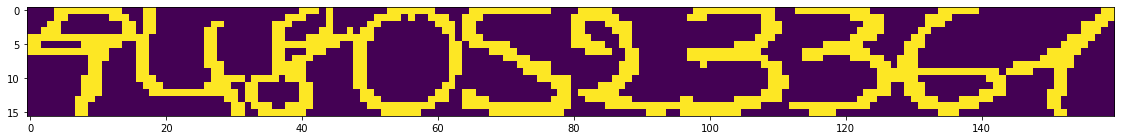

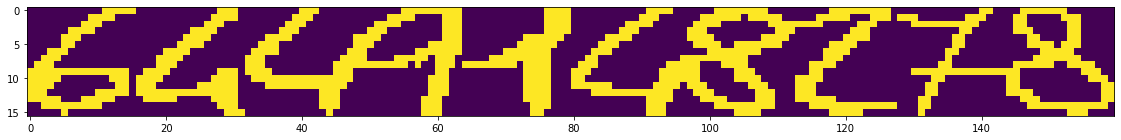

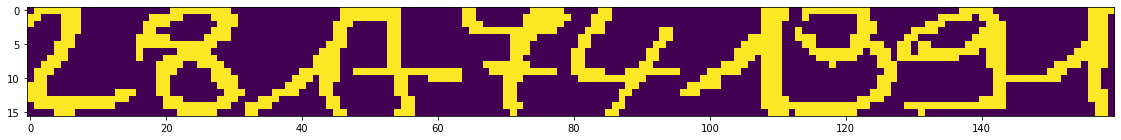

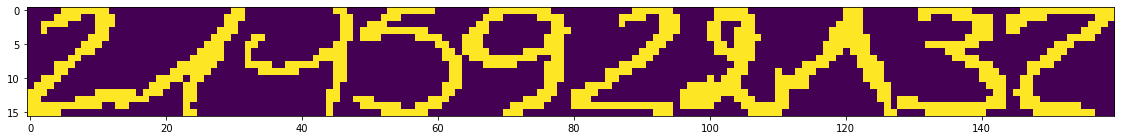

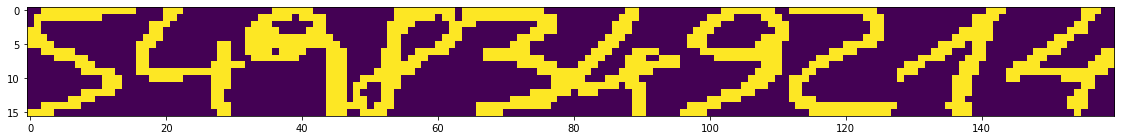

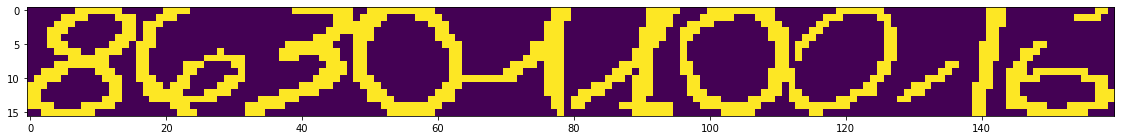

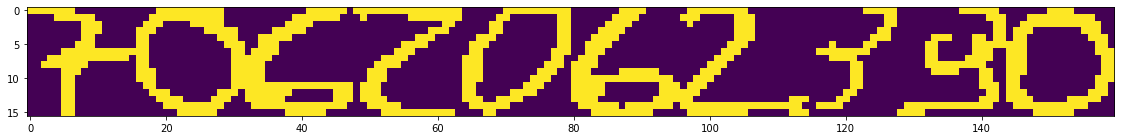

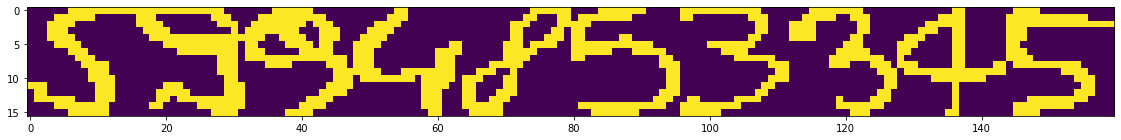

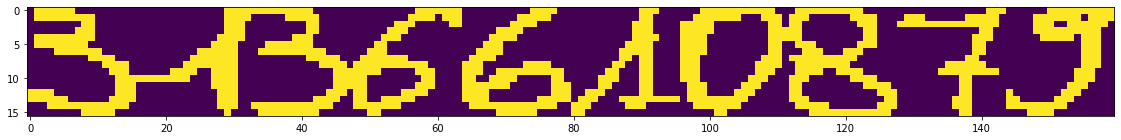

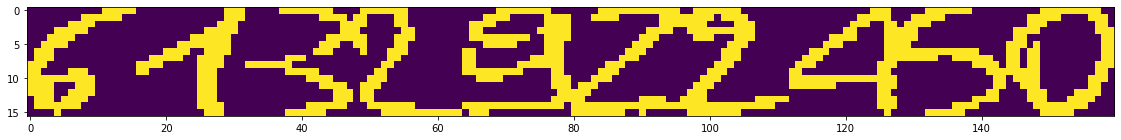

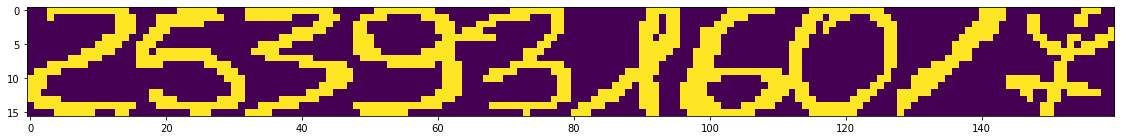

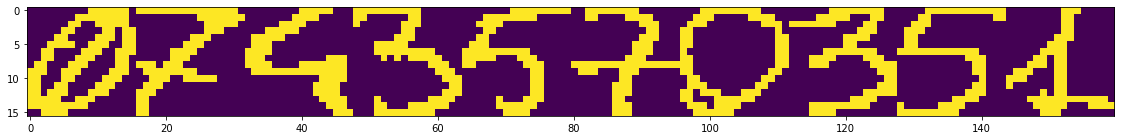

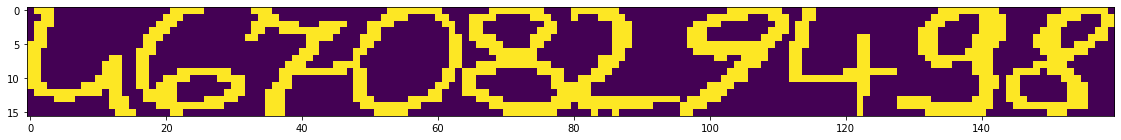

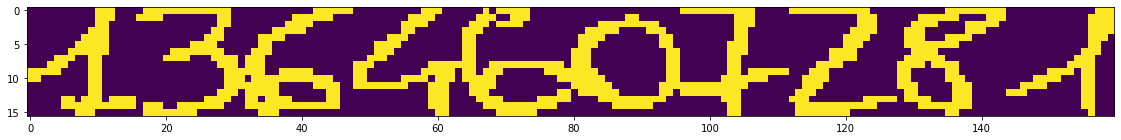

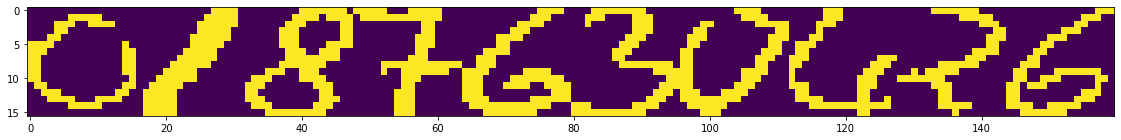

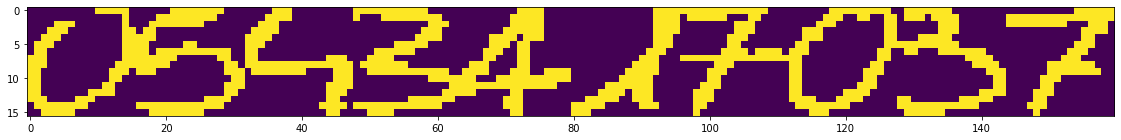

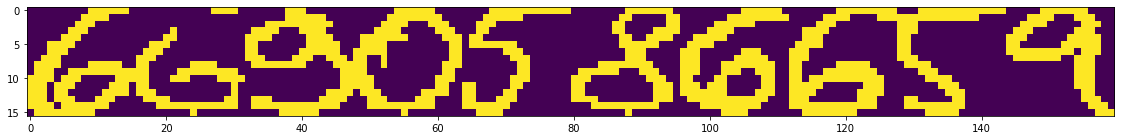

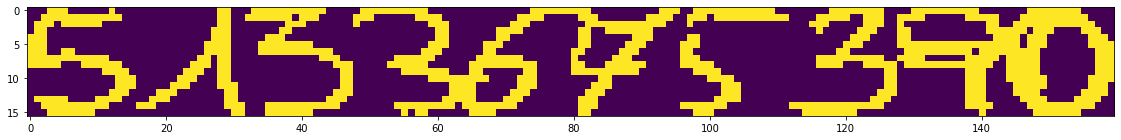

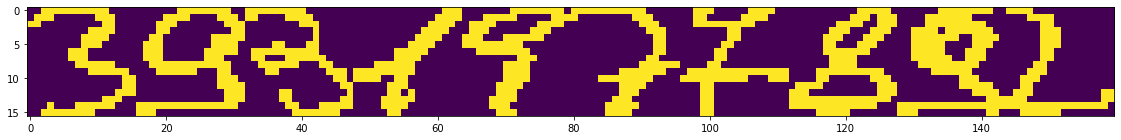

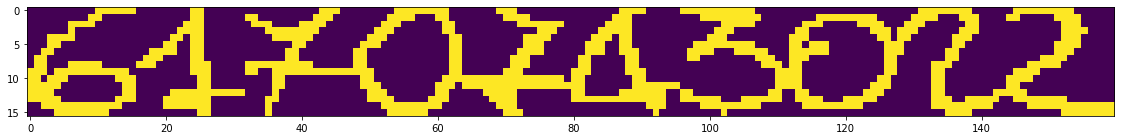

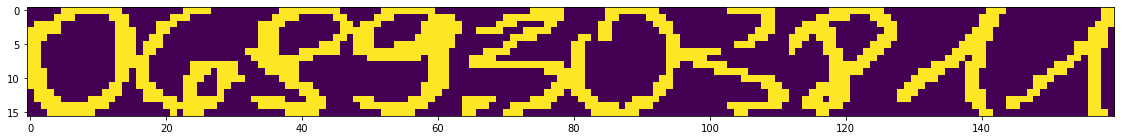

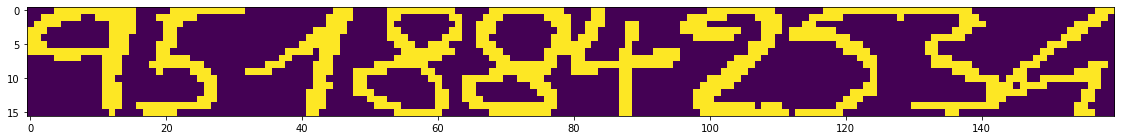

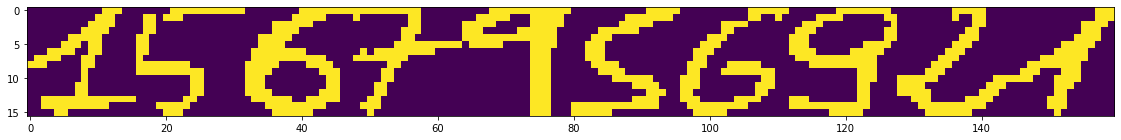

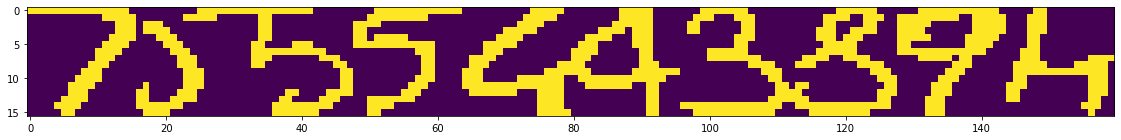

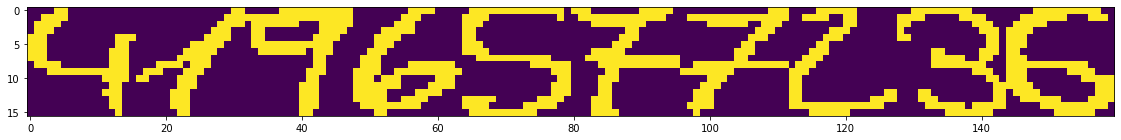

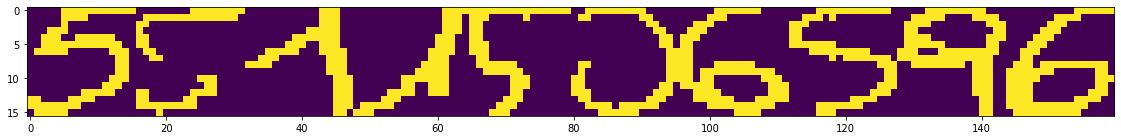

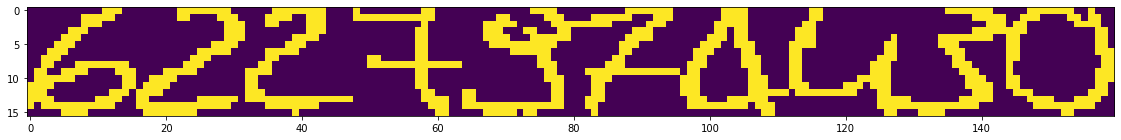

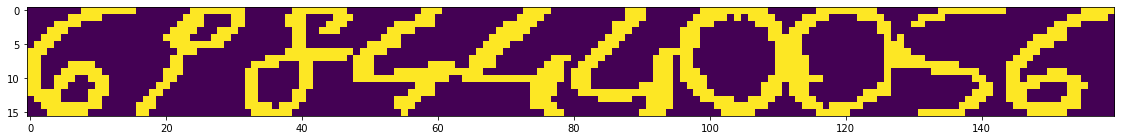

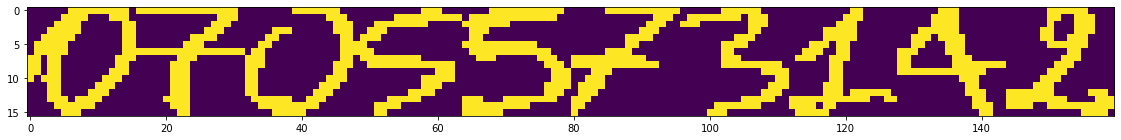

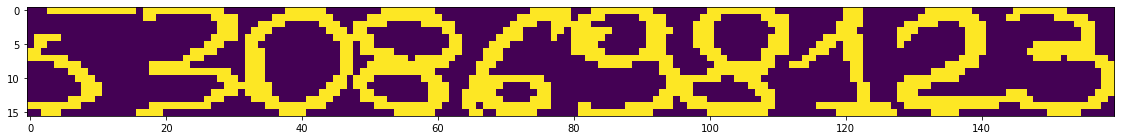

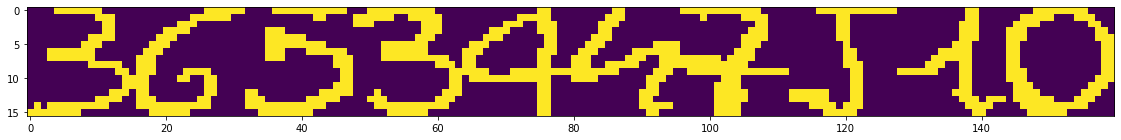

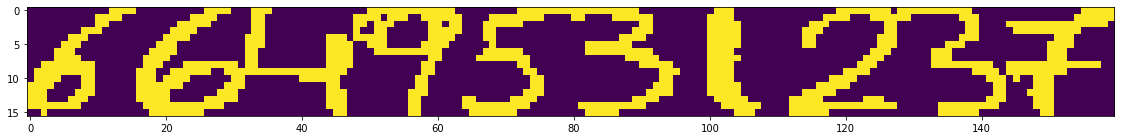

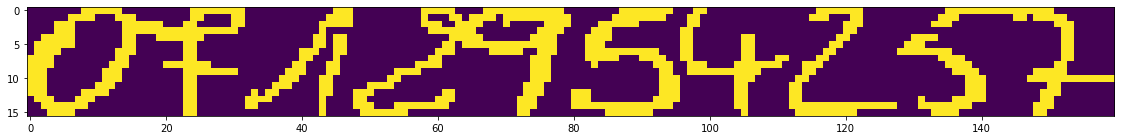

In [44]:
val_data_reg_as_not_8 = val_data[predictions==0] # all samples in the validation set that are regonized as anything else
visualize_data(val_data_reg_as_not_8)

Calculate accuracy on the validation set

In [45]:
model.score(val_data, val_labels[:,8])

0.924

In [46]:
sklearn.metrics.f1_score(predictions, val_labels[:,8])

0.47222222222222227

<h2>Task 3</h2>

Hyperparameter learning: Using the validation set, determine the best value of the regularisation parameter $C$. $C$ is analogous to $\lambda$, however, lower values of $C$ mean <i>higher</i> importance of the regularisation term because $C=\frac{1}{\lambda}$. Furthermore, decide, whether $L_1$ or $L_2$ regularisation leads to better results. <br>
Hint: you may need to consult the documentation of <b>sklearn.linear_model.LogisticRegression</b> in order to solve this task.

In [47]:
C_values = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
regularisation_types = ['l1', 'l2']

best_f1_score = float('inf')
best_model = None

for C_value in C_values:
    for regularisation_type in regularisation_types:
        model = sklearn.linear_model.LogisticRegression(C=C_value, penalty=regularisation_type)
        model.fit(train_data, train_labels[:, 8])
        predictions = model.predict(test_data)
        f = sklearn.metrics.f1_score(predictions, test_labels[:, 8])

        

        if f < best_f1_score:
            best_model = model

D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:43

We assess the quality of the "best" model using the test set.

In [48]:
model = sklearn.linear_model.LogisticRegression(C=20, penalty='l1')
model.fit(train_data, train_labels[:,8])
predictions = model.predict(test_data)
f = sklearn.metrics.f1_score(predictions, test_labels[:,8])

D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
f

0.4331210191082802

Predictions on a continuous scale: probabilities of being an "8"

In [50]:
predictions = model.predict_proba(val_data)

In [51]:
predictions

array([[9.99600031e-01, 3.99969364e-04],
       [7.78129041e-01, 2.21870959e-01],
       [9.99912340e-01, 8.76597391e-05],
       [9.97306042e-01, 2.69395757e-03],
       [9.98157538e-01, 1.84246174e-03],
       [9.99932123e-01, 6.78768169e-05],
       [7.57923915e-01, 2.42076085e-01],
       [6.59849969e-01, 3.40150031e-01],
       [9.99648490e-01, 3.51510063e-04],
       [7.93948604e-01, 2.06051396e-01],
       [9.98300675e-01, 1.69932483e-03],
       [9.99348292e-01, 6.51708300e-04],
       [5.07015357e-01, 4.92984643e-01],
       [6.87003515e-01, 3.12996485e-01],
       [9.98589384e-01, 1.41061611e-03],
       [1.67993383e-01, 8.32006617e-01],
       [9.98939703e-01, 1.06029674e-03],
       [9.93359931e-01, 6.64006860e-03],
       [9.99851182e-01, 1.48818431e-04],
       [9.83729979e-01, 1.62700207e-02],
       [9.99990473e-01, 9.52740369e-06],
       [9.99953000e-01, 4.70001472e-05],
       [9.99203209e-01, 7.96791243e-04],
       [9.99972188e-01, 2.78118927e-05],
       [9.987076

<h2>Task 4</h2>

Implement a class for recognition of any of the 10 digits. In order to do that, you have to train 10 models, each one will be responsible for the recognition of one of the digits. Once the models are trained, in order to classify a new image (i.e., in order to make predictions for a new image) you will make a probabilistic prediction with each of the 10 models, so that you have a probability for each of the 10 digits. Finally, you will select the digit with highest probability.

In [52]:
class DigitRecognizer:

    def __init__(self):
        self.train_data = None
        self.train_labels = None
        self.classification_models = [] # models corresponding to classifying each digit

    def train_model_to_classify_digit(self, digit):
        model = sklearn.linear_model.LogisticRegression()
        model.fit(train_data, train_labels[:, digit])
        return model

    def train(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
        self.classification_models = []

        for digit in range(0, 10):
            model = self.train_model_to_classify_digit(digit)
            self.classification_models.append(model)

    def predict(self, test_data):
        predict_scores = []
        for digit, model in enumerate(self.classification_models):
            score = model.predict_proba(test_data)[:, 1].reshape(-1, 1)
            predict_scores.append(score)

        pred = np.hstack(predict_scores)
        pred_labels = np.argmax(pred, axis=1)
        return pred_labels


dr = DigitRecognizer()
dr.train(train_data, train_labels)
predictions = dr.predict(val_data)

D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:43

In [53]:
dr = DigitRecognizer()

In [54]:
dr.train(train_data, train_labels)

D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:43

In [55]:
predictions = dr.predict(val_data)

In [56]:
predictions

array([5, 5, 4, 6, 5, 6, 8, 8, 9, 6, 9, 2, 3, 9, 7, 8, 0, 6, 0, 6, 9, 3,
       3, 6, 3, 5, 2, 7, 9, 7, 6, 8, 1, 6, 1, 7, 7, 1, 8, 7, 5, 0, 8, 7,
       0, 7, 4, 9, 8, 6, 2, 7, 0, 6, 1, 6, 0, 2, 0, 9, 8, 1, 4, 1, 6, 7,
       6, 0, 7, 5, 6, 3, 8, 6, 8, 4, 2, 6, 8, 1, 8, 7, 5, 2, 8, 6, 6, 6,
       6, 3, 1, 8, 4, 0, 1, 2, 2, 8, 2, 2, 3, 7, 7, 8, 5, 1, 7, 3, 1, 4,
       6, 7, 8, 6, 1, 9, 9, 6, 3, 3, 0, 3, 3, 1, 2, 7, 4, 4, 3, 6, 6, 6,
       6, 1, 0, 1, 3, 8, 4, 0, 9, 2, 7, 7, 1, 1, 6, 9, 4, 8, 0, 8, 3, 2,
       3, 3, 6, 7, 6, 1, 4, 9, 1, 6, 8, 2, 7, 8, 2, 9, 1, 7, 7, 4, 1, 3,
       8, 9, 1, 2, 7, 9, 9, 9, 2, 8, 2, 1, 3, 8, 5, 4, 9, 2, 3, 6, 9, 2,
       1, 6, 8, 6, 1, 0, 1, 1, 0, 0, 1, 6, 7, 0, 6, 2, 0, 6, 2, 8, 1, 0,
       6, 9, 9, 4, 1, 8, 9, 3, 9, 7, 5, 3, 1, 3, 6, 6, 1, 0, 8, 1, 1, 6,
       1, 8, 2, 8, 9, 2, 2, 6, 5, 0, 2, 5, 3, 9, 9, 1, 6, 0, 1, 8, 0, 2,
       4, 3, 5, 7, 0, 3, 5, 8, 1, 4, 6, 7, 0, 8, 2, 9, 4, 9, 8, 1, 3, 6,
       6, 6, 0, 7, 2, 8, 1, 0, 1, 8, 1, 7, 6, 3, 0,

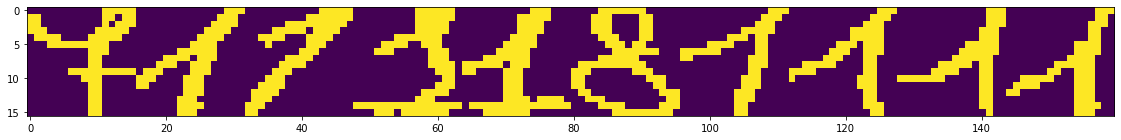

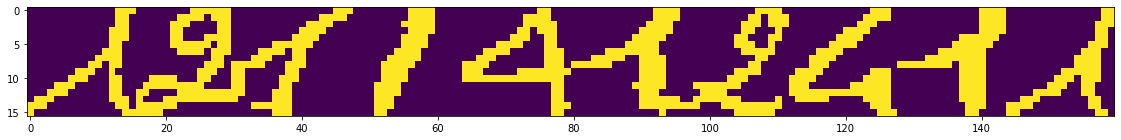

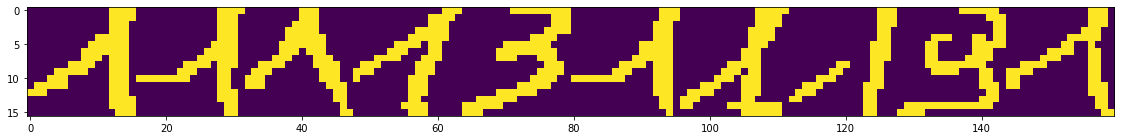

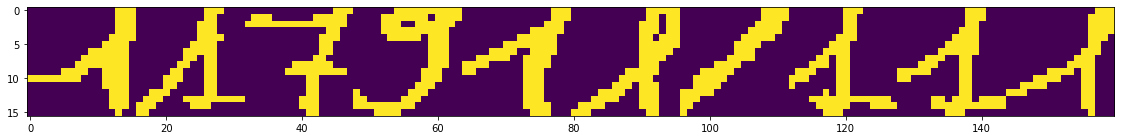

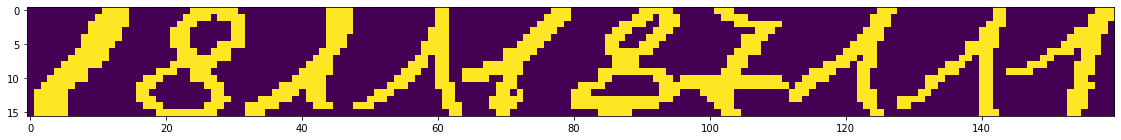

In [57]:
visualize_data(val_data[predictions==1], 10)

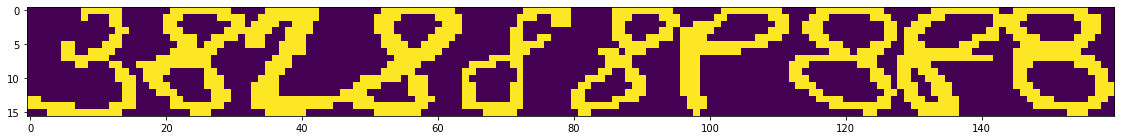

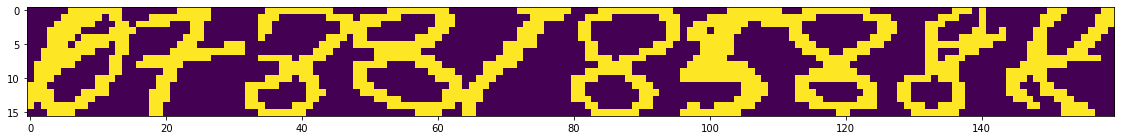

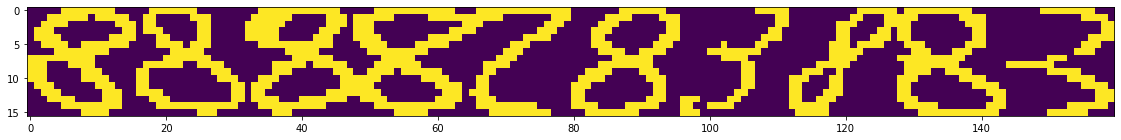

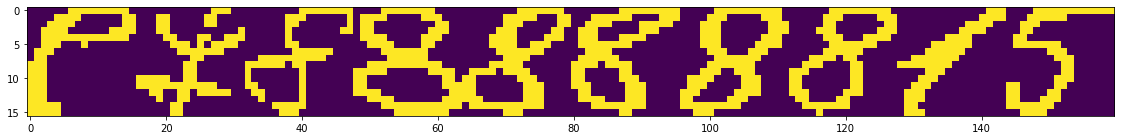

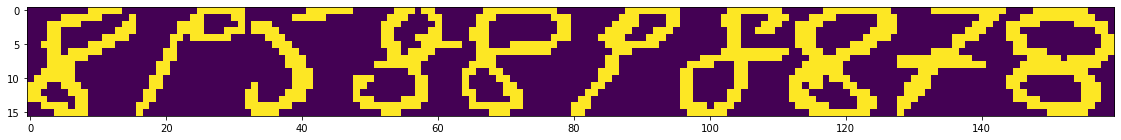

'54 samples are reconginized as digit 8'

In [58]:
visualize_data(val_data[predictions == 8], 10)
"{} samples are reconginized as digit 8". format(val_data[predictions==8].shape[0])